## Simple Exponential Smoothing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [2]:
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Avg%20Hourly%20Traffic%20Data%20-%202012-2013.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  494 non-null    object 
 1   ID        494 non-null    float64
 2   Count     494 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [3]:
df.columns

Index(['Datetime', 'ID', 'Count'], dtype='object')

In [4]:
df.isnull().sum()

Datetime    0
ID          0
Count       0
dtype: int64

In [5]:
df.shape

(494, 3)

In [6]:
df.describe()

,ID,Count
count,494.000000,494.000000
mean,5927.500000,60.804656
std,3425.994746,57.468859
min,11.500000,2.416667
25%,2969.500000,15.520833
50%,5927.500000,37.083333
75%,8885.500000,95.062500
max,11843.500000,257.750000


In [7]:
df['Datetime'] = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime

Simple exponential smoothing

## splitting the data in train and test data

In [8]:
import math
total_size=len(df)
split = 10392 / 11856
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

In [9]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Create prediction table
y_hat = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))


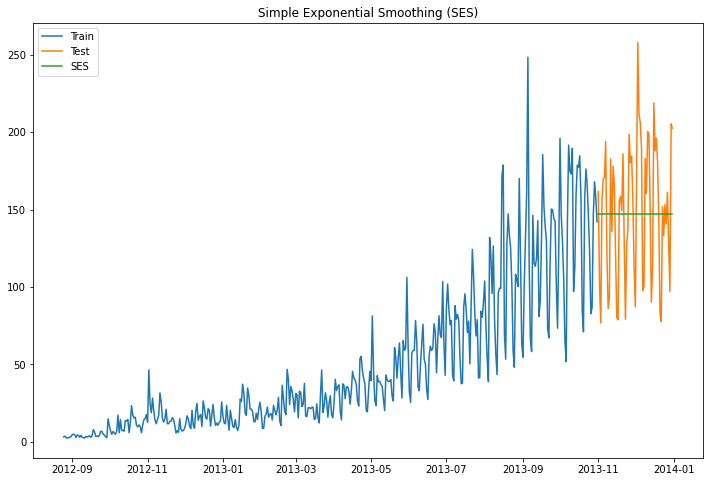

In [10]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['SES'], label='SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing (SES)")
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.SES))
print('RMSE = '+str(rms))

RMSE = 43.35762522522814


In [12]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.info()
df.Month = pd.to_datetime(df.Month,format='%Y-%m')
df.index = df.Month
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [13]:
#Creating train and test set 
import math
total_size=len(df)
train_size=math.floor(0.7*total_size) #(70% Dataset)
train=df.head(train_size)
test=df.tail(len(df) -train_size)


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-01-01 to 1957-04-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       100 non-null    datetime64[ns]
 1   Passengers  100 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 1957-05-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       44 non-null     datetime64[ns]
 1   Passengers  44 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB


In [16]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Create prediction table
y_hat = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Passengers'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))
y_hat.describe()

,Passengers,SES
count,44.000000,4.400000e+01
mean,421.068182,3.429591e+02
std,77.330279,4.025041e-13
min,305.000000,3.429591e+02
25%,359.750000,3.429591e+02
50%,406.500000,3.429591e+02
75%,465.500000,3.429591e+02
max,622.000000,3.429591e+02


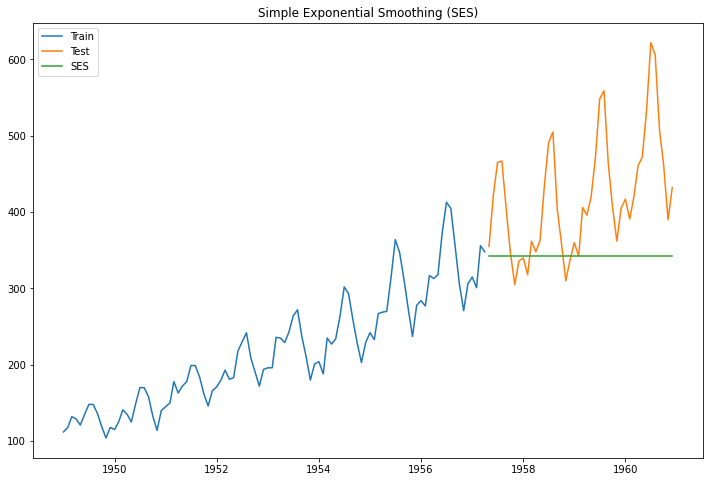

In [17]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['SES'], label='SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing (SES)")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Passengers, y_hat.SES))
print('RMSE = '+str(rms))

RMSE = 109.29360124771299


In [19]:
def SES_forecasting(mydf,colval,split):
    #print(split)
    import math
    from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    fit2 = SimpleExpSmoothing(np.asarray(train[colval])).fit(smoothing_level=0.6,optimized=False)
    y_hat['SES'] = fit2.forecast(len(test))
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['SES'], label='SES')
    plt.legend(loc='best')
    plt.title("Simple Exponential Smoothing (SES)")
    plt.show()
    rms = sqrt(mean_squared_error(test[colval], y_hat.SES))
    print('RMSE = '+str(rms))

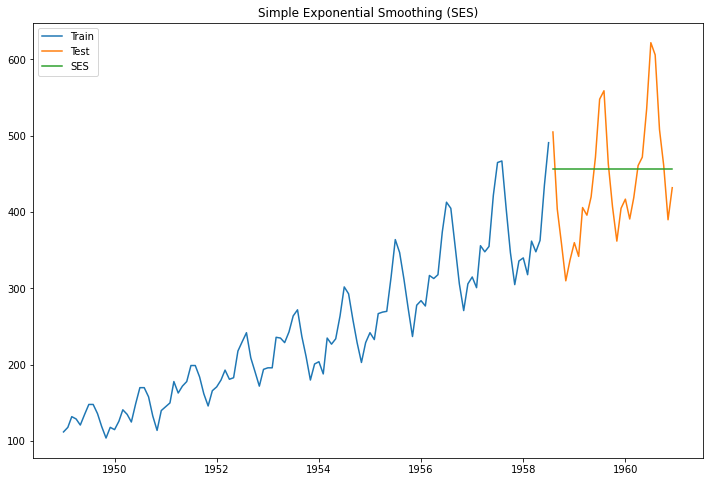

RMSE = 79.71276692933388


In [20]:
('RMSE = '+str(rms))
SES_forecasting(df,'Passengers',0.8)

In [21]:
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.info()
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    176 non-null    object
 1   Sales   176 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


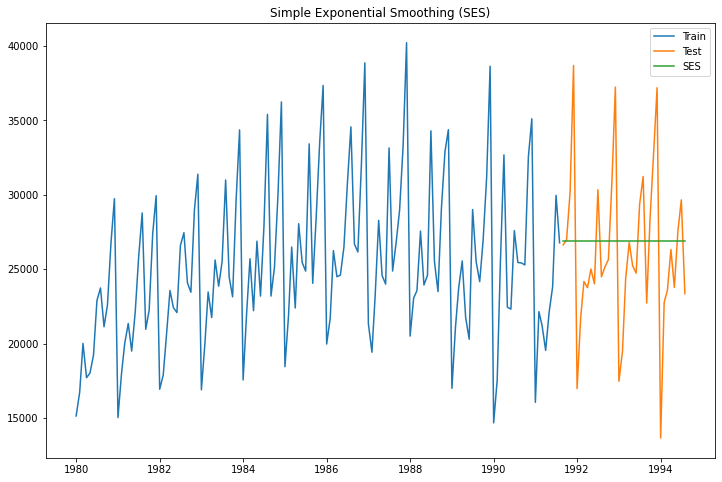

RMSE = 5347.631463787599


In [22]:
SES_forecasting(df,'Sales',0.8)

## Moving Averages

In [23]:
import pandas as pd
 
# importing numpy as np
# for Mathematical calculations
import numpy as np
 
# importing pyplot from matplotlib as plt
# for plotting graphs
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [24]:
df["SMA30"] = df["Sales"].rolling(30).mean()
df.dropna(inplace=True)
df

,Date,Sales,SMA30
Date,,,
1982-06-01,1982-06-01,22084,21609.533333
1982-07-01,1982-07-01,26580,21991.000000
1982-08-01,1982-08-01,27454,22348.366667
1982-09-01,1982-09-01,24081,22483.866667
1982-10-01,1982-10-01,23451,22675.300000
...,...,...,...
1994-04-01,1994-04-01,26323,26152.700000
1994-05-01,1994-05-01,23779,25938.433333
1994-06-01,1994-06-01,27549,25567.166667


<AxesSubplot: xlabel='Date'>

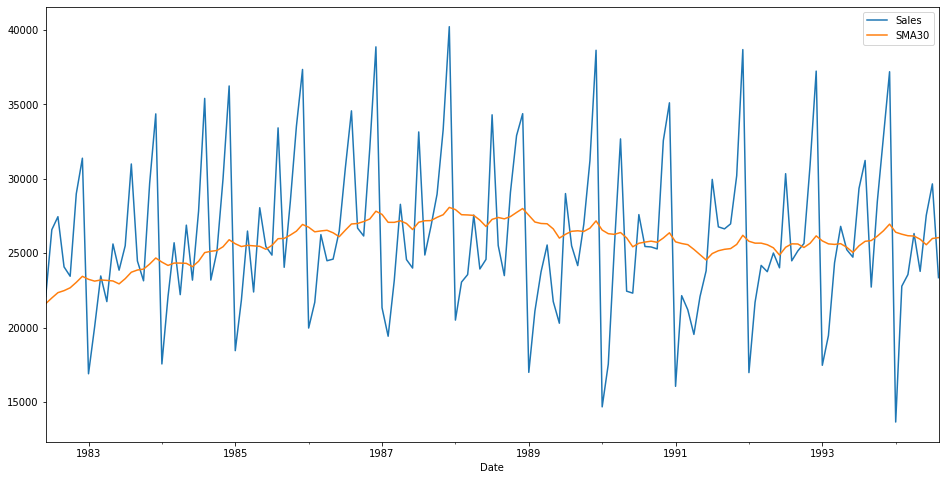

In [25]:
df[['Sales', 'SMA30']].plot(label='sales',
                                  figsize=(16, 8))